Confusion Matrix:
 [[1039   58]
 [  22  433]]


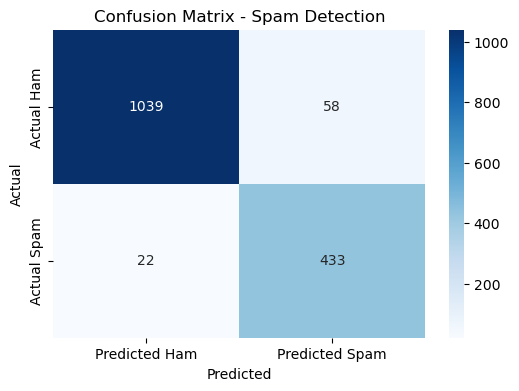


Accuracy: 0.9484536082474226
Precision: 0.8818737270875764
Recall: 0.9516483516483516
F1 Score: 0.9154334038054969

Test 1: Congratulations! You have won a lottery. Claim your prize now! -> SPAM
Test 2: Hi team, please find the attached project report. Thanks. -> HAM


In [5]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------- LOAD DATASET --------------------
df = pd.read_csv('emails.csv')

# Remove non-feature column
data = df.drop(columns=['Email No.'])

# Features (X) and Target (y)
X = data.drop(columns=['Prediction']).astype(np.float32).values
y = data['Prediction'].values

# -------------------- TRAIN TEST SPLIT --------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# -------------------- TRAIN NAIVE BAYES --------------------
def train_nb(X, y):
    spam = X[y == 1]
    ham = X[y == 0]

    # Laplace smoothing
    spam_wc = np.sum(spam, axis=0) + 1
    ham_wc = np.sum(ham, axis=0) + 1

    P_spam = spam_wc / np.sum(spam_wc)
    P_ham = ham_wc / np.sum(ham_wc)

    prior_spam = len(spam) / len(X)
    prior_ham = len(ham) / len(X)

    return P_spam, P_ham, prior_spam, prior_ham

P_spam, P_ham, prior_spam, prior_ham = train_nb(X_train, y_train)

# -------------------- PREDICT FUNCTION --------------------
def predict_nb(X):
    log_P_spam = np.log(P_spam)
    log_P_ham = np.log(P_ham)

    preds = []
    for x in X:
        spam_score = np.sum(x * log_P_spam) + np.log(prior_spam)
        ham_score = np.sum(x * log_P_ham) + np.log(prior_ham)
        preds.append(1 if spam_score > ham_score else 0)
    return np.array(preds)

y_pred = predict_nb(X_test)

# -------------------- EVALUATION METRICS --------------------
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)


# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Predicted Ham", "Predicted Spam"],
            yticklabels=["Actual Ham", "Actual Spam"])
plt.title("Confusion Matrix - Spam Detection")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()
print("\nAccuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

# -------------------- CLASSIFY NEW TEXT --------------------
# Get words corresponding to BoW columns
bow_words = data.drop(columns=['Prediction']).columns.tolist()

def classify_email(text):
    # Preprocess text
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()

    vec = np.zeros(len(bow_words))

    # Convert to vector
    for word in words:
        if word in bow_words:
            vec[bow_words.index(word)] += 1

    # Compute scores
    spam_score = np.sum(vec * np.log(P_spam)) + np.log(prior_spam)
    ham_score = np.sum(vec * np.log(P_ham)) + np.log(prior_ham)

    return "SPAM" if spam_score > ham_score else "HAM"

# -------------------- SAMPLE TESTS --------------------
test1 = "Congratulations! You have won a lottery. Claim your prize now!"
test2 = "Hi team, please find the attached project report. Thanks."

print("\nTest 1:",test1,"->",classify_email(test1))
print("Test 2:",test2,"->", classify_email(test2))


In [6]:
# Extract TN, FP, FN, TP from confusion matrix
TN, FP, FN, TP = cm.ravel()

# Calculate metrics using formulas
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = (2 * precision * recall) / (precision + recall)

print("\n--- Metric Calculations (Manual) ---")
print("TN:", TN, "FP:", FP, "FN:", FN, "TP:", TP)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



--- Metric Calculations (Manual) ---
TN: 1039 FP: 58 FN: 22 TP: 433
Accuracy: 0.9484536082474226
Precision: 0.8818737270875764
Recall: 0.9516483516483516
F1 Score: 0.9154334038054969


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns